In [1]:
import random
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

novosib_list = [1964, 2851, 3338, 1569]
bel_list = [1921, 776, 655, 2000]
ekat_list = [361, 1397, 1832, 206] 
kuz_list = [2428, 3316, 3803, 2034]

# Helpers
def clearWeigth(w_pop, chrom_size):
    cleared_pop = []
    for chrom in w_pop:
        if len(chrom) > chrom_size:
            cleared_chrom = chrom[:chrom_size]
            cleared_pop.append(cleared_chrom)
        else:
            cleared_pop.append(chrom)
    return cleared_pop

def createChrom(chrom_size):
    chrom = []
    while len(chrom) != chrom_size:
        rint = random.randint(0, chrom_size - 1)
        if rint not in chrom:
            chrom.append(rint)
    return chrom


def fitness(chrom):
    dist = 0
    for index, gen in enumerate(chrom):
        if index == 0:
            dist += novosib_list[gen]
        elif index == 1:
            dist += bel_list[gen]
        elif index == 2:
            dist += ekat_list[gen]
        elif index == 3:
            dist += kuz_list[gen]
        elif index == 4:
            dist += a_list[gen]
    return dist

# Main func
def createInitPop(pop_size, chrom_size):
    i = 0
    pop = []
    for i in range(0, pop_size):
        pop.append(createChrom(chrom_size))
        i += 1
    return pop

def weightChrom(chrom, chrom_size):
    w = fitness(chrom)
    w_chrom = chrom.copy()
    if len(set(w_chrom)) != chrom_size:
        w *= w
    w_chrom.append(w)
    return w_chrom

def weightPop(pop, chrom_size):
    w_pop = []
    for chrom in pop:
        w_chrom = weightChrom(chrom, chrom_size)
        w_pop.append(w_chrom)
    sorted(w_pop, key=itemgetter(4))
    return w_pop

def selection(w_pop):
    total_luck = 0
    selected_pop = []
    for chrom in w_pop:
        total_luck += chrom[4]
    previous_sum = 0
    for chrom in w_pop:
        luck = chrom[4]
        # Чем меньше расстояние, тем меньше шансов быть убитым (задача на минимизацию)
        bullet = random.randint(0, total_luck)
        chrom_dead = True if bullet > previous_sum and bullet <= previous_sum + luck else False
        if not chrom_dead:
            selected_pop.append(chrom)
    return selected_pop

def crossover(selected_pop, sep_gen):
    children_pop = []
    parents_pop = selected_pop.copy()
    i = 0
    while i < len(selected_pop):
        try:
            parent1_index = random.randint(0, len(parents_pop) - 1)
            parent1 = parents_pop.pop(parent1_index)
            parent2_index = random.randint(0, len(parents_pop) - 1)
            parent2 = parents_pop.pop(parent2_index)
            son1 = parent2[:sep_gen] + parent1[sep_gen:len(parent1) - 1]
            son2 = parent1[:sep_gen] + parent2[sep_gen:len(parent2) - 1]
            children_pop.append(son1)
            children_pop.append(son2)
        except ValueError:
            pass
        i += 2

    return children_pop

def newGenerationCreator(selected_pop, children_pop, pop_size, chrom_size, elite_share):
    w_parents_pop = selected_pop
    w_children_pop = weightPop(children_pop, chrom_size)
    elite = round(pop_size * elite_share)
    new_generation = [x[:len(x)] for x in w_parents_pop[0:elite]] + [x[:len(x)] for x in w_children_pop[0:pop_size - elite]]
    if len(new_generation) - 1 < pop_size:
        to_add = pop_size - len(new_generation)
        new_generation += w_parents_pop[elite:elite + to_add + 1]
    return new_generation


def mutation(new_generation, chance_from_1_to_10, chrom_size):
    mutated_new_generation = []
    for chrom in new_generation:
        mutate = True if random.randint(1, 10) <= chance_from_1_to_10 else False
        if mutate:
            separator = random.randint(0, len(chrom) - 2)
            new_chrom = chrom[separator:-1] + chrom[0:separator]
            new_chrom = weightChrom(new_chrom, chrom_size)
            mutated_new_generation.append(new_chrom)
        else:
            mutated_new_generation.append(chrom)
    return mutated_new_generation

def run(pop_size, chrom_size, sep_gen, elite_share, chance_from_1_to_10, iter_num):
    i = [0]
    best_result = []
    pop = createInitPop(pop_size, chrom_size)
    for iteration in range(0, iter_num + 1):
        i.append(i[-1] + 1)
        pop = clearWeigth(pop, chrom_size)
        w_pop = weightPop(pop, chrom_size)
        selected_pop = selection(w_pop)
        children_pop = crossover(selected_pop, sep_gen)
        new_generation = newGenerationCreator(selected_pop, children_pop, len(pop), chrom_size, elite_share)
        mutated_new_generation = mutation(new_generation, chance_from_1_to_10, chrom_size)
        pop = mutated_new_generation
        best_result.append(pop[0][-1])
    if len(pop[0]) == chrom_size:
        result = weightPop(pop, chrom_size)[0]
    else: 
        result = pop[0]
    return [best_result, i]

In [2]:
best_result, i = run(20, 4, 2, .1, 0, 10)

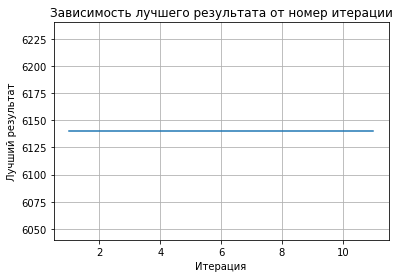

In [3]:
plt.title("Зависимость лучшего результата от номер итерации")
plt.xlabel("Итерация")         
plt.ylabel("Лучший результат") 
plt.grid()
plt.ylim([min(best_result[1:]) - 100, max(best_result) + 100])             
plt.plot(i[1:], best_result)  